In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [47]:
df1 = pd.read_csv('arm_K101_25000_B4_50000.txt', sep=',')
# df2 = pd.read_csv('eye_K1_00000_B0_00800.txt', sep=',')
# df3 = pd.read_csv('eye_K1_00000_B0_02600.txt', sep=',')

In [48]:
df1.head()

,time,t_er_arm1,t_dot_er_arm1,t_er_arm2,t_dot_er_arm2
0,0.001,-2.827435,-0.001126,2.827434,0.000186
1,0.002,-2.823888,7.094618,2.826164,-2.539513
2,0.003,-2.814323,12.034640,2.822524,-4.741177
3,0.004,-2.800534,15.544129,2.816798,-6.709414
4,0.005,-2.783718,18.087689,2.809191,-8.505851


In [49]:
df1.shape

(3350, 5)

In [50]:
S1 = -45
A0 = math.pi/2
A1 = -math.pi/2
A2 = (-45*math.pi)/2
print(A0, A1, A2, S1)

1.5707963267948966 -1.5707963267948966 -70.68583470577035 -45


In [51]:
def equation(x):
    return A0 + (A1*math.exp(S1*x)) + (A2*x*math.exp(S1*x)) 

In [52]:
df1['analysis'] = df1['time'].apply(equation)

In [53]:
df1.head()

,time,t_er_arm1,t_dot_er_arm1,t_er_arm2,t_dot_er_arm2,analysis
0,0.001,-2.827435,-0.001126,2.827434,0.000186,0.001544
1,0.002,-2.823888,7.094618,2.826164,-2.539513,0.005993
2,0.003,-2.814323,12.034640,2.822524,-4.741177,0.013089
3,0.004,-2.800534,15.544129,2.816798,-6.709414,0.022590
4,0.005,-2.783718,18.087689,2.809191,-8.505851,0.034271


In [54]:
df1.iloc[[1999]]

,time,t_er_arm1,t_dot_er_arm1,t_er_arm2,t_dot_er_arm2,analysis
1999,2.0,0.000127,-0.000556,0.00013,-0.000238,1.570796


In [56]:
df1.at[1999, 'analysis']

1.5707963267948966

In [57]:
for i in range(1999, 2999):
    df1.at[i, 'analysis'] = df1.at[i - 1999, 'analysis']

(-2, 2)

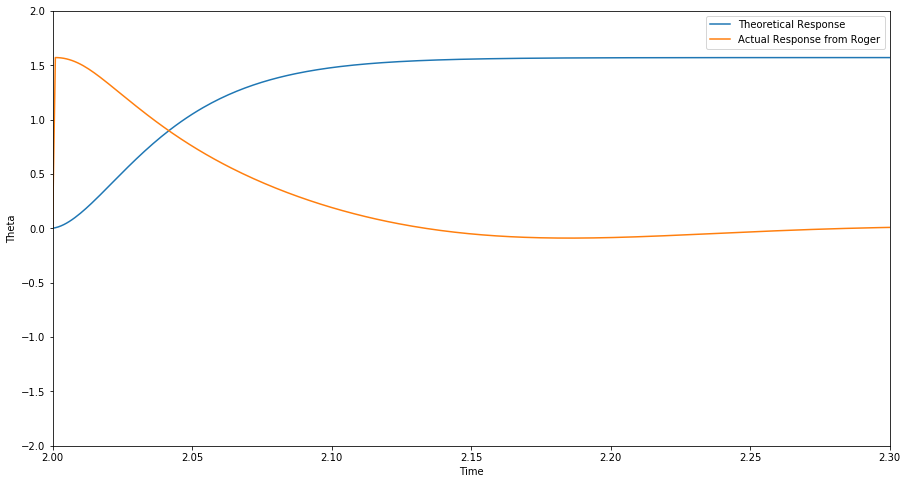

In [60]:
plt.plot(df1['time'], df1['analysis'], label='Theoretical Response')
plt.plot(df1['time'], df1['t_er_arm2'], label='Actual Response from Roger')
# plt.plot(df1['time'], df1['t_er_arm2'], label='Actual Response from Roger')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.xlim(2, 2.3)
plt.ylim(-2, 2)

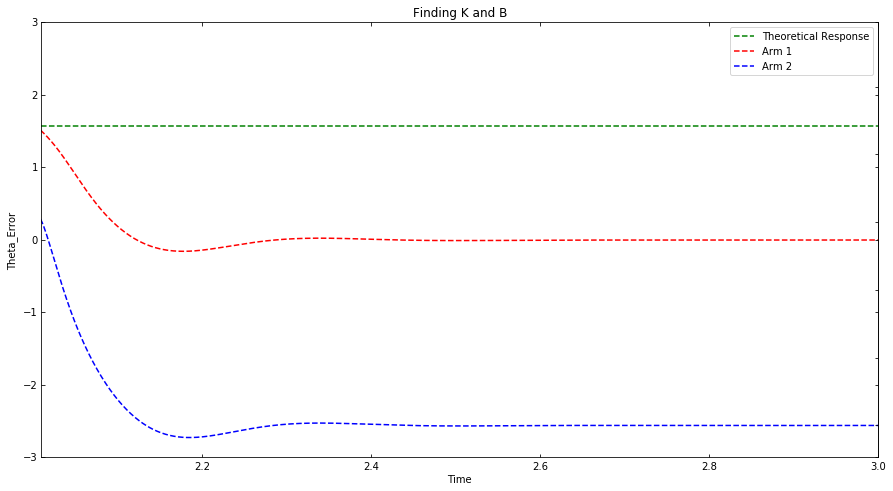

In [30]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

lim_x_min = 2.01
lim_x_max = 3
lim_y_min = -3
lim_y_max = 3

host = host_subplot(111, axes_class=AA.Axes)
# plt.subplots_adjust(right=0.75)
plt.rcParams["figure.figsize"] = 15,8

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(lim_x_min, lim_x_max)
host.set_ylim(lim_y_min, lim_y_max)

host.set_xlabel("Time")
host.set_ylabel("Theta_Error")
# par1.set_ylabel("Temperature")
# par2.set_ylabel("Velocity")

p1, = host.plot(df1['time'], df1['analysis'], 'g--', label="Theoretical Response")
p2, = par1.plot(df1['time'], df1['t_er_arm1'], 'r--', label="Arm 1")
p3, = par2.plot(df1['time'], df1['t_er_arm2'], 'b--', label="Arm 2")

par1.set_ylim(lim_y_min, lim_y_max)
# par2.set_ylim(lim_y_min, lim_y_max)

plt.title('Finding K and B')
host.legend()

# host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()